In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
import lightgbm as lgb

In [3]:
sys.path.insert(0,os.getcwd()+"/../../src/main")

In [4]:
!echo $LOCAL

/local/5178387


In [5]:
!mkdir $LOCAL/sandbox

mkdir: cannot create directory ‘/local/5178387/sandbox’: File exists


In [6]:
HOME=os.environ['LOCAL']+"/sandbox"
os.chdir(HOME)
os.getcwd()

'/local/5178387/sandbox'

In [7]:
os.environ['LANLEP_HOME']=HOME

In [8]:
import data

In [10]:
!ls /home/lizhen09/lanlep2019/input/feat/*.parq | grep -v offset_.parq | xargs -L1  -IINPUT cp INPUT {HOME}/input/feat/

In [12]:
!cp /home/lizhen09/lanlep2019/input/feat/*.pkl {HOME}/input/feat/

In [9]:
reload (data)

<module 'data' from '/home/lizhen09/mydev/lanlep2019/notebook/2/../../src/main/data.pyc'>

In [9]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['fwv']
    traintest = data.TrainTest('coverage', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [10]:
traintest.num_dataset()

5

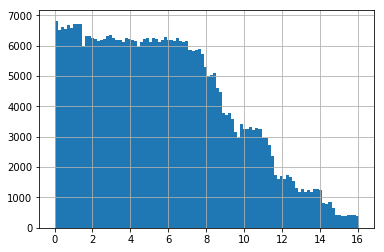

In [11]:
traintest.ydf.hist(bins=100);

In [12]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.0299900335398275

In [13]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 100)

In [14]:
datadf=pd.concat([traintest.traindf, traintest.ydf],axis=1)
print datadf.shape
datadf.head()

(419359, 101)


fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                  
quake_14_o38092704  0.059493  0.288745  0.175394 -0.306433  0.127363   
quake_05_o21076314  0.193220  0.223538  0.108353 -0.108521  0.048008   
quake_09_o34152517  0.195538  0.221066  0.115602 -0.111520  0.071273   
quake_07_o29907005  0.120579  0.257296  0.096898 -0.180808  0.078737   
quake_03_o11370843  0.219481  0.194752  0.059049 -0.080931  0.064311   

                       fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  ...  \
index                                                                 ...   
quake_14_o38092704  0.078662  0.099293  0.320627  0.193841 -0.237509  ...   
quake_05_o21076314 -0.075768  0.018792  0.188903  0.167017 -0.079257  ...   
quake_09_o34152517 -0.085213 -0.029911  0.200946  0.154639 -0.073049  ...   
quake_07_o29907005 -0.026547  0.014643  0.191294  0.165722 -0.116214  ...   
quake_03_o11370843 -0.142953 -0.051948  0.098170  0.169367  0.026442  ...   

                      fwv_91    fwv_92    fwv_93    fwv_94    fwv_95  \
index                                                                  
quake_14_o38092704  0.119633  0.019761  0.043149  0.216871  0.032755   
quake_05_o21076314  0.173315  0.101008  0.032328  0.010907  0.033171   
quake_09_o34152517  0.195082  0.087095  0.034098 -0.026654  0.023064   
quake_07_o29907005  0.154124  0.055500  0.069783  0.097929  0.058242   
quake_03_o11370843  0.203573  0.129579  0.062429 -0.040362  0.015726   

                      fwv_96    fwv_97    fwv_98    fwv_99         y  
index                                                                 
quake_14_o38092704  0.095359 -0.141673 -0.095935  0.154893  4.818398  
quake_05_o21076314  0.027125 -0.087466 -0.007180  0.079947  2.541899  
quake_09_o34152517  0.001101 -0.098248  0.031839  0.082902  0.727197  
quake_07_o29907005  0.032560 -0.102489 -0.025202  0.069889  8.299899  
quake_03_o11370843  0.013697 -0.070627  0.042443 -0.026576  5.864797  

[5 rows x 101 columns]

In [15]:
datadf= datadf[~datadf.index.duplicated(keep='first')]
datadf.shape

(419248, 101)

In [16]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                    
quake_14_o38092704     14
quake_05_o21076314      5
quake_09_o34152517      9
quake_07_o29907005      7
quake_03_o11370843      3

In [17]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3766  29606  36381  22721  32572  20661  18112  41320  20285  24722   

          10     11     12     13     14     15    16  
index  29316  28282  22648  21974  37848  24269  4765

In [18]:
qdf=qdf[~qdf['index'].isin({0,16,2,7,14,4,10,1,11})]
datadf=datadf.loc[qdf.index]
ydf=datadf['y']
datadf=datadf.drop('y',axis=1)
qdf.shape,datadf.shape,ydf.shape

((175392, 1), (175392, 100), (175392,))

In [19]:
qlen=qdf['index'].value_counts().to_dict()
str(qlen)

'{3: 22721, 5: 20661, 6: 18112, 8: 20285, 9: 24722, 12: 22648, 13: 21974, 15: 24269}'

In [20]:
quakes=set(qdf['index'])
quakes

{3, 5, 6, 8, 9, 12, 13, 15}

In [21]:
import utils
n_thread= utils.get_num_thread()
n_thread

11

In [22]:
def topn(testv,n,trainX):
    assert n>0
    testv=testv.reshape((1,-1))
    delta =trainX-testv
    delta=np.sum(delta*delta,1)
    aindex=np.argsort(delta) 
    return list(aindex[:n])
    

In [23]:
testX=testdf.values
testX.shape

(2624, 100)

In [24]:
trainX=datadf.values
trainX.shape, qdf.shape

((175392, 100), (175392, 1))

In [25]:
%%time
topidxs  = []
for testv in testX:
    a = topn(testv,3000,trainX)
    topidxs += a

CPU times: user 23min 49s, sys: 2min 27s, total: 26min 17s
Wall time: 2min 23s


In [26]:
len(topidxs),len(set(topidxs)),len(testX),len(topidxs)/len(testX)

(7872000, 159827, 2624, 3000)

In [27]:
qdf.iloc[topidxs].head()

index
index                    
quake_06_o17988314      6
quake_06_o23373381      6
quake_06_o23373373      6
quake_06_o23382979      6
quake_06_o18021814      6

In [28]:
idxdf=pd.DataFrame(np.array(qdf.iloc[topidxs].values).reshape([-1,len(testX)],order='F'))

In [29]:
idxdf.shape

(3000, 2624)

In [30]:
idxdf.head()

0     1     2     3     4     5     6     7     8     9     ...  2614  \
0     6    15    13     6    15     9     6     8     9     6  ...    15   
1     6    15    13     6    15     9     6    13     5     6  ...    15   
2     6    15    13     6    15     9     6    13     3     6  ...    15   
3     6    15    13     6    15     9     6    13     9     6  ...    15   
4     6    15    13     6    15     9     6     9     9     6  ...    15   

   2615  2616  2617  2618  2619  2620  2621  2622  2623  
0    15    12    15    15    15    15    15     8    15  
1    15     6    15    15    12    15    15     8    15  
2    15    13    15    15    12    15    15     8    15  
3     5    12    15    15    12    15    15     8    15  
4    15    12    15    15    12    15    15     8    15  

[5 rows x 2624 columns]

In [31]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:1000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.sort_index(ascending=False).cumsum(0)/len(testX),2))

3 5 6 8 9 12 13 15 


0                                          
qno      3     5     6     8     9     12    13    15
index                                                
0.0    0.82  0.39  0.32  0.56  0.57  0.78  0.55  0.10
0.1    0.09  0.37  0.22  0.26  0.20  0.16  0.30  0.18
0.2    0.04  0.17  0.12  0.14  0.14  0.04  0.13  0.21
0.3    0.03  0.06  0.06  0.04  0.06  0.01  0.02  0.11
0.4    0.01  0.02  0.05  0.01  0.02  0.00  0.00  0.06
0.5    0.00  0.00  0.07   NaN  0.01  0.00   NaN  0.04
0.6    0.00   NaN  0.08   NaN   NaN   NaN   NaN  0.04
0.7     NaN   NaN  0.07   NaN   NaN   NaN   NaN  0.03
0.8     NaN   NaN  0.01   NaN   NaN   NaN   NaN  0.04
0.9     NaN   NaN  0.00   NaN   NaN   NaN   NaN  0.05
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.14

0                                          
qno      3     5     6     8     9     12    13    15
index                                                
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.14
0.9     NaN   NaN  0.00   NaN   NaN   NaN   NaN  0.19
0.8     NaN   NaN  0.01   NaN   NaN   NaN   NaN  0.23
0.7     NaN   NaN  0.08   NaN   NaN   NaN   NaN  0.26
0.6    0.00   NaN  0.16   NaN   NaN   NaN   NaN  0.30
0.5    0.00  0.00  0.23   NaN  0.01  0.00   NaN  0.34
0.4    0.01  0.02  0.28  0.01  0.02  0.00  0.00  0.40
0.3    0.04  0.08  0.34  0.04  0.09  0.02  0.03  0.51
0.2    0.09  0.24  0.46  0.18  0.23  0.06  0.15  0.72
0.1    0.18  0.61  0.68  0.44  0.43  0.22  0.45  0.90
0.0    1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00

In [32]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:2000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.cumsum(0)/len(testX),2))

3 5 6 8 9 12 13 15 


0                                          
qno      3     5     6     8     9     12    13    15
index                                                
0.0    0.82  0.37  0.27  0.53  0.55  0.77  0.51  0.08
0.1    0.10  0.39  0.25  0.28  0.22  0.18  0.35  0.16
0.2    0.05  0.18  0.13  0.15  0.16  0.04  0.13  0.24
0.3    0.03  0.05  0.07  0.03  0.06  0.01  0.01  0.12
0.4    0.00  0.01  0.06  0.00  0.01  0.00   NaN  0.06
0.5    0.00   NaN  0.08   NaN   NaN   NaN   NaN  0.06
0.6    0.00   NaN  0.11   NaN   NaN   NaN   NaN  0.04
0.7     NaN   NaN  0.03   NaN   NaN   NaN   NaN  0.04
0.8     NaN   NaN  0.00   NaN   NaN   NaN   NaN  0.05
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.05
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.10

0                                          
qno      3     5     6     8     9     12    13    15
index                                                
0.0    0.82  0.37  0.27  0.53  0.55  0.77  0.51  0.08
0.1    0.91  0.76  0.51  0.82  0.76  0.95  0.86  0.24
0.2    0.97  0.94  0.64  0.96  0.92  0.99  0.99  0.48
0.3    1.00  0.99  0.71  1.00  0.99  1.00  1.00  0.60
0.4    1.00  1.00  0.77  1.00  1.00  1.00   NaN  0.66
0.5    1.00   NaN  0.85   NaN   NaN   NaN   NaN  0.72
0.6    1.00   NaN  0.96   NaN   NaN   NaN   NaN  0.76
0.7     NaN   NaN  1.00   NaN   NaN   NaN   NaN  0.80
0.8     NaN   NaN  1.00   NaN   NaN   NaN   NaN  0.85
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.90
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.00

In [33]:
lst=[]
for qno in quakes:
    print qno,
    a=(idxdf.iloc[:3000]==qno).mean().round(1).value_counts().to_frame()
    a['qno']=qno    
    lst.append(a)
print ""    
adf = pd.pivot_table(pd.concat(lst).reset_index(), index='index', columns='qno',values=[0])
display(np.round(adf/len(testX),2))
display(np.round(adf.cumsum(0)/len(testX),2))   

3 5 6 8 9 12 13 15 


0                                          
qno      3     5     6     8     9     12    13    15
index                                                
0.0    0.82  0.35  0.23  0.51  0.52  0.77  0.48  0.08
0.1    0.10  0.41  0.26  0.30  0.24  0.18  0.38  0.14
0.2    0.05  0.19  0.14  0.16  0.17  0.04  0.13  0.25
0.3    0.03  0.05  0.08  0.03  0.06  0.01  0.01  0.13
0.4    0.00  0.00  0.07  0.00  0.00  0.00   NaN  0.07
0.5     NaN   NaN  0.10   NaN   NaN   NaN   NaN  0.06
0.6    0.00   NaN  0.11   NaN   NaN   NaN   NaN  0.05
0.7     NaN   NaN  0.01   NaN   NaN   NaN   NaN  0.05
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.04
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.08

0                                          
qno      3     5     6     8     9     12    13    15
index                                                
0.0    0.82  0.35  0.23  0.51  0.52  0.77  0.48  0.08
0.1    0.92  0.76  0.50  0.81  0.76  0.95  0.86  0.22
0.2    0.97  0.95  0.63  0.97  0.93  0.99  0.99  0.47
0.3    1.00  1.00  0.71  1.00  1.00  1.00  1.00  0.61
0.4    1.00  1.00  0.78  1.00  1.00  1.00   NaN  0.67
0.5     NaN   NaN  0.88   NaN   NaN   NaN   NaN  0.73
0.6    1.00   NaN  0.99   NaN   NaN   NaN   NaN  0.78
0.7     NaN   NaN  1.00   NaN   NaN   NaN   NaN  0.83
0.8     NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.87
0.9     NaN   NaN   NaN   NaN   NaN   NaN   NaN  0.92
1.0     NaN   NaN   NaN   NaN   NaN   NaN   NaN  1.00

In [34]:
topquakes= qdf.iloc[topidxs]
topquakes['index'].value_counts().sort_index()

3      258755
5      767482
6     1822627
8      574182
9      648570
12     251742
13     548447
15    3000195
Name: index, dtype: int64

In [35]:
topquakes= qdf.iloc[list(set(topidxs))]
topquakes['index'].value_counts().sort_index()

3     19260
5     20364
6     15803
8     19119
9     22909
12    18439
13    19759
15    24174
Name: index, dtype: int64

In [36]:
filtered_idx=list(set(topidxs))
qdf=qdf.iloc[filtered_idx]
datadf=datadf.iloc[filtered_idx]
ydf=ydf.iloc[filtered_idx]
qdf.shape,datadf.shape,ydf.shape

((159827, 1), (159827, 100), (159827,))

In [37]:
def train_quake(qno1,qno2,params,n_thread):
    if qno1==qno2: return np.nan,np.nan
    assert (qno1 in quakes)
    assert (qno2 in quakes)
    print 'valid quake', qno2, 'train quake', qno1
    teidx=qdf['index']==qno2
    tridx=qdf['index']==qno1
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 1500, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=50, early_stopping_rounds=200)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [38]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'huber',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [39]:
validScores={}
for qno1 in quakes:
    for qno2 in quakes:
        s=train_quake(qno1, qno2, params,n_thread)
        print "quake ", qno1, qno2, s
        validScores[(qno1,qno2)]=s

quake  3 3 (nan, nan)
valid quake 5 train quake 3
(19260, 100) (19260,) (20364, 100) (20364,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.78768	valid_1's l1: 1.08649
[100]	training's l1: 0.499383	valid_1's l1: 1.08642
[150]	training's l1: 0.349515	valid_1's l1: 1.11754
[200]	training's l1: 0.265264	valid_1's l1: 1.1438
[250]	training's l1: 0.220055	valid_1's l1: 1.15822
Early stopping, best iteration is:
[65]	training's l1: 0.67428	valid_1's l1: 1.07574
quake  3 5 (1.0757407115285367, 65)
valid quake 6 train quake 3
(19260, 100) (19260,) (15803, 100) (15803,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.78768	valid_1's l1: 1.04721
[100]	training's l1: 0.499383	valid_1's l1: 1.03006
[150]	training's l1: 0.349515	valid_1's l1: 1.04865
[200]	training's l1: 0.265264	valid_1's l1: 1.06575
[250]	training's l1: 0.220055	valid_1's l1: 1.07478
Early stopping, best iteration is:
[89]	training's l1: 0.545881	valid_1'

[150]	training's l1: 0.352842	valid_1's l1: 0.976436
[200]	training's l1: 0.275827	valid_1's l1: 0.980834
[250]	training's l1: 0.235828	valid_1's l1: 0.986167
[300]	training's l1: 0.21155	valid_1's l1: 0.991432
[350]	training's l1: 0.19629	valid_1's l1: 0.995415
Early stopping, best iteration is:
[150]	training's l1: 0.352842	valid_1's l1: 0.976436
quake  5 13 (0.9764361366842849, 150)
valid quake 15 train quake 5
(20364, 100) (20364,) (24174, 100) (24174,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.761475	valid_1's l1: 2.1596
[100]	training's l1: 0.49512	valid_1's l1: 2.30379
[150]	training's l1: 0.352842	valid_1's l1: 2.37024
[200]	training's l1: 0.275827	valid_1's l1: 2.42229
Early stopping, best iteration is:
[18]	training's l1: 1.14708	valid_1's l1: 2.02368
quake  5 15 (2.0236803469778106, 18)
valid quake 3 train quake 6
(15803, 100) (15803,) (19260, 100) (19260,)
Training until validation scores don't improve for 200 rounds.
[50]	training

[1150]	training's l1: 0.10173	valid_1's l1: 1.09503
[1200]	training's l1: 0.0999136	valid_1's l1: 1.09497
[1250]	training's l1: 0.0982503	valid_1's l1: 1.09503
[1300]	training's l1: 0.0965615	valid_1's l1: 1.09417
[1350]	training's l1: 0.0950397	valid_1's l1: 1.09446
[1400]	training's l1: 0.0935224	valid_1's l1: 1.09461
[1450]	training's l1: 0.0920517	valid_1's l1: 1.09404
[1500]	training's l1: 0.0906584	valid_1's l1: 1.09419
quake  6 13 (1.0941853780194397, 0)
valid quake 15 train quake 6
(15803, 100) (15803,) (24174, 100) (24174,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.701479	valid_1's l1: 2.64392
[100]	training's l1: 0.456306	valid_1's l1: 2.80281
[150]	training's l1: 0.323686	valid_1's l1: 2.88409
[200]	training's l1: 0.249467	valid_1's l1: 2.92921
Early stopping, best iteration is:
[16]	training's l1: 1.12093	valid_1's l1: 2.40472
quake  6 15 (2.4047225249537134, 16)
valid quake 3 train quake 8
(19119, 100) (19119,) (19260, 100) (19260

Early stopping, best iteration is:
[84]	training's l1: 0.629374	valid_1's l1: 1.52052
quake  9 6 (1.520524574370695, 84)
valid quake 8 train quake 9
(22909, 100) (22909,) (19119, 100) (19119,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.859889	valid_1's l1: 1.60146
[100]	training's l1: 0.557637	valid_1's l1: 1.63345
[150]	training's l1: 0.410666	valid_1's l1: 1.6631
[200]	training's l1: 0.335172	valid_1's l1: 1.68297
Early stopping, best iteration is:
[17]	training's l1: 1.33853	valid_1's l1: 1.58732
quake  9 8 (1.5873151880027654, 17)
quake  9 9 (nan, nan)
valid quake 12 train quake 9
(22909, 100) (22909,) (18439, 100) (18439,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.859889	valid_1's l1: 1.08042
[100]	training's l1: 0.557637	valid_1's l1: 1.00357
[150]	training's l1: 0.410666	valid_1's l1: 0.993885
[200]	training's l1: 0.335172	valid_1's l1: 0.995332
[250]	training's l1: 0.293762	valid_1's l1: 0.9995

[1200]	training's l1: 0.107546	valid_1's l1: 1.09004
[1250]	training's l1: 0.105607	valid_1's l1: 1.08957
[1300]	training's l1: 0.103805	valid_1's l1: 1.08934
[1350]	training's l1: 0.102018	valid_1's l1: 1.08911
[1400]	training's l1: 0.100262	valid_1's l1: 1.08918
[1450]	training's l1: 0.0986584	valid_1's l1: 1.0893
[1500]	training's l1: 0.0970712	valid_1's l1: 1.08881
quake  12 15 (1.0888146868158404, 0)
valid quake 3 train quake 13
(19759, 100) (19759,) (19260, 100) (19260,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.826531	valid_1's l1: 1.29856
[100]	training's l1: 0.54762	valid_1's l1: 1.20317
[150]	training's l1: 0.404191	valid_1's l1: 1.16754
[200]	training's l1: 0.326458	valid_1's l1: 1.1557
[250]	training's l1: 0.284392	valid_1's l1: 1.14988
[300]	training's l1: 0.257505	valid_1's l1: 1.15666
[350]	training's l1: 0.237803	valid_1's l1: 1.16346
[400]	training's l1: 0.223145	valid_1's l1: 1.16789
Early stopping, best iteration is:
[245]	t

[1100]	training's l1: 0.128022	valid_1's l1: 1.56076
[1150]	training's l1: 0.125821	valid_1's l1: 1.56087
[1200]	training's l1: 0.123761	valid_1's l1: 1.55889
[1250]	training's l1: 0.121734	valid_1's l1: 1.55427
[1300]	training's l1: 0.119765	valid_1's l1: 1.55263
[1350]	training's l1: 0.118026	valid_1's l1: 1.55234
[1400]	training's l1: 0.116271	valid_1's l1: 1.549
[1450]	training's l1: 0.114504	valid_1's l1: 1.54534
[1500]	training's l1: 0.11288	valid_1's l1: 1.54328
quake  15 5 (1.5432768183590124, 0)
valid quake 6 train quake 15
(24174, 100) (24174,) (15803, 100) (15803,)
Training until validation scores don't improve for 200 rounds.
[50]	training's l1: 0.824033	valid_1's l1: 1.9418
[100]	training's l1: 0.523408	valid_1's l1: 1.89927
[150]	training's l1: 0.367396	valid_1's l1: 1.87859
[200]	training's l1: 0.285671	valid_1's l1: 1.85598
[250]	training's l1: 0.243701	valid_1's l1: 1.8457
[300]	training's l1: 0.219681	valid_1's l1: 1.83622
[350]	training's l1: 0.204305	valid_1's l1: 1

In [40]:
vdf=pd.DataFrame(validScores).T.dropna().reset_index()
vdf.columns=['q1','q2','score','round']
vdf['round']=vdf['round'].astype(np.int)
vdf=vdf.sort_values('score')

In [41]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_max]

In [42]:
pvdf=vdf.pivot_table(values='score',index='q1',columns='q2').round(2)

In [43]:
pvdf.style.apply(highlight_max,axis=1)

In [44]:
pvdf.style.apply(highlight_min,axis=1)

In [45]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

#pvdf.fillna(0).style.background_gradient(cmap='viridis')
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=0))
display(pvdf.fillna(pvdf.median().median()).style.background_gradient(cmap=cm,axis=1))